# Basic functionalities of `kerrgeodesic_gw`

This Jupyter notebook requires [SageMath](http://www.sagemath.org/) (version $\geq$ 8.2), with the package [kerrgeodesic_gw](https://github.com/BlackHolePerturbationToolkit/kerrgeodesic_gw). To install it, simply run `sage -pip install kerrgeodesic_gw` 

First, we set up the notebook to use LaTeX-formatted display:

In [1]:
%display latex

## Spin-weighted spherical harmonics

Let us first introduce two symbolic variables for the angles $\theta$ and $\phi$:

In [2]:
theta, phi = var('theta phi')

Spin-weighted spherical harmonics ${}_{s} Y_{\ell m}(\theta,\phi)$ are given by the function `spin_weighted_spherical_harmonic`:

In [3]:
from kerrgeodesic_gw import spin_weighted_spherical_harmonic

For instance, the harmonic ${}_{-2} Y_{4,3}(\theta,\phi)$ is

In [4]:
spin_weighted_spherical_harmonic(-2, 4, 3, theta, phi)

-3/16*(2*sqrt(7)*sqrt(2)*cos(theta)^3 + 3*sqrt(7)*sqrt(2)*cos(theta)^2 - sqrt(7)*sqrt(2))*e^(3*I*phi)*sin(theta)/sqrt(pi)

As for any SageMath function, the documentation of this function is accessible with the question mark:

In [5]:
#spin_weighted_spherical_harmonic?

A double question mark returns the Python source code (SageMath is open-source, isn't it?)

In [6]:
# spin_weighted_spherical_harmonic??

The value at $\theta=\frac{\pi}{2}$ and $\phi=\frac{\pi}{4}$:

In [7]:
spin_weighted_spherical_harmonic(-2, 4, 3, pi/2, pi/4)

(3/16*I - 3/16)*sqrt(7)/sqrt(pi)

The same thing as a SageMath floating point number (RDF=Real Double Field):

In [8]:
spin_weighted_spherical_harmonic(-2, 4, 3, pi/2, pi/4, numerical=RDF)

-0.2798822494425865 + 0.27988224944258655*I

Evaluation on floating point values:

In [9]:
spin_weighted_spherical_harmonic(-2, 4, 3, 1.5, 2.)

0.373137046398365 - 0.108585190736943*I

One can ask for an evaluation with a arbitrary precision. For instance, for a evaluation with 200 bits of precision:

In [10]:
R200 = RealField(200)
print(R200)

Real Field with 200 bits of precision


In [11]:
spin_weighted_spherical_harmonic(-2, 4, 3, 1.5, 2., numerical=R200)

0.37313704639836510249804293001585548897558479457873139190993 - 0.10858519073694266117255822336581183461167520083611848591637*I

## Spin weighted spheroidal harmonics

Spin weighted spherical harmonics ${}_{s} S_{\ell m}^\gamma(\theta,\phi)$ are given by the function `spin_weighted_spheroidal_harmonic`:

In [12]:
from kerrgeodesic_gw import spin_weighted_spheroidal_harmonic

For instance, the harmonic ${}_{-2} S_{4,3}^{1.1}\left(\frac{\pi}{2},\frac{\pi}{3}\right)$ is

In [13]:
spin_weighted_spheroidal_harmonic(-2, 2, 1, 1.1, pi/2, pi/3)

0.1121279717272447 + 0.1942113439812344*I

The output is always a double precision number, even if the input has larger precision:

In [14]:
spin_weighted_spheroidal_harmonic(-2, 2, 1, 1.1, R200(2), R200(3))

-0.0859643850221275 + 0.0122539259124105*I

Some plots for $s=-2$ and $\ell=3$:

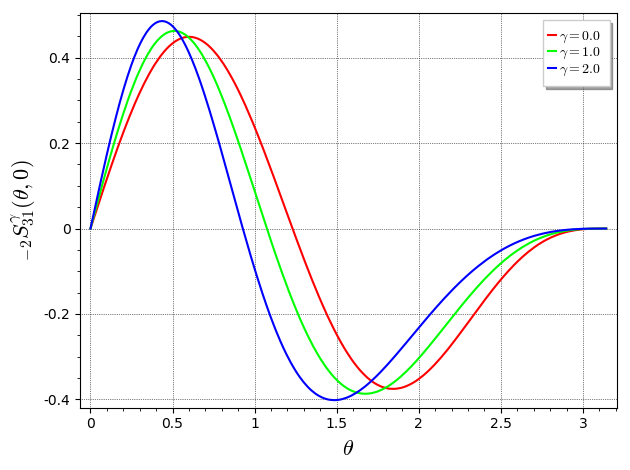

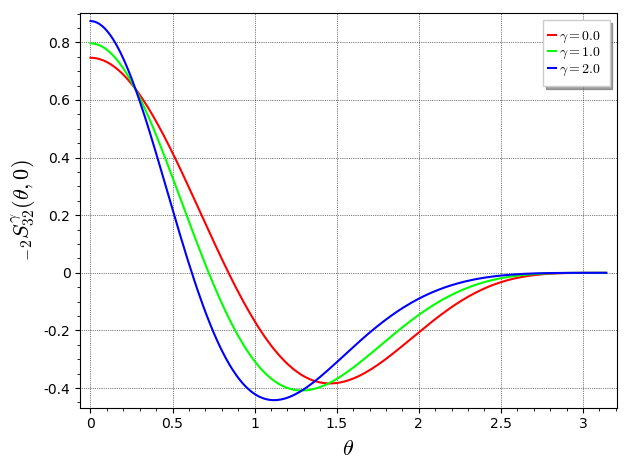

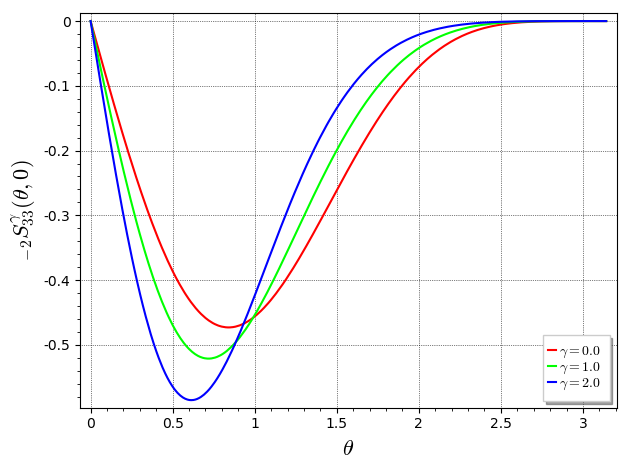

In [15]:
s, l = -2, 3
for m in [1..3]:
    g = Graphics() 
    for gam in  [0, 1, 2]:
        g += plot(spin_weighted_spheroidal_harmonic(s, l, m, gam, theta, 0), 
                  (theta, 0, pi), color=hue(gam/3), thickness=1.5,
                  legend_label=r"$\gamma = {:.1f}$".format(float(gam)),  
                  axes_labels=[r"$\theta$", 
                               r"${{}}_{{{}}}S_{{{}{}}}^\gamma(\theta,0)$".format(s,l,m)],
                  gridlines=True, frame=True, axes=False)
    show(g)

Some 3D polar plot of ${}_{-2} S_{2,2}^\gamma$ with $\gamma=0.3$ (real part in turquoise, imaginary part in gold):

In [16]:
gam = 0.3
Slm = lambda th, ph: spin_weighted_spheroidal_harmonic(-2, 2, 2, gam, th, ph)
re = lambda th, ph: Slm(th, ph).real_part()
im = lambda th, ph: Slm(th, ph).imag_part()
th, ph = var('th ph')
graph = parametric_plot3d([re(th, ph)*sin(th)*cos(ph), 
                           re(th, ph)*sin(th)*sin(ph),
                           re(th, ph)*cos(th)], 
                          (th, 0, pi), (ph, 0, 2*pi), plot_points=20, color='turquoise')
graph += parametric_plot3d([im(th, ph)*sin(th)*cos(ph), 
                            im(th, ph)*sin(th)*sin(ph),
                            im(th, ph)*cos(th)], 
                           (th, 0, pi), (ph, 0, 2*pi), plot_points=20, color='gold')
show(graph, viewer='threejs', online=True)

Graphics3d Object

## Amplitude factor $Z_{\ell m}^\infty(r_0)$ for gravitational radiation from circular equatorial orbits

The factor $Z_{\ell m}^\infty(r_0)$ is obtained by spline interpolation of tabulated numerical solutions of the radial component of the Teukolsky equation. It is returned by the function
`Zinf`:

In [17]:
from kerrgeodesic_gw import Zinf

In [18]:
a = 0.98
l, m = 2, 2
r0 = 1.7
Zinf(a, l, m, r0)

-0.04302234478778856 + 0.28535368610053824*I

Plot as a function of the orbital radius:

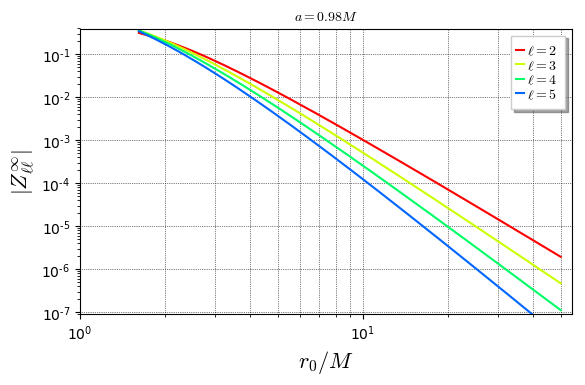

In [19]:
from kerrgeodesic_gw import KerrBH
rmin = KerrBH(a).isco_radius()
rmax = 50.
graph = Graphics()
for l in range(2, 6):
    legend_label = r"$\ell = {}$".format(l)
    graph += plot_loglog(lambda r: abs(Zinf(a, l, l, r)), 
                         (r, rmin, rmax), thickness=1.5, 
                         color = hue((l-2)/5), legend_label=legend_label,
                         gridlines=('minor', 'major'), frame=True, axes=False,  
                         axes_labels=[r"$r_0/M$", 
                                      r"$\left|Z^\infty_{\ell\ell}\right|$"],
                         title=r"$a={}M$".format(float(a)), ymin=1e-7)
graph